<a href="https://colab.research.google.com/github/AnalystExplorer/projects/blob/main/weather_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px
import pandas as pd


import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/seattle-weather (1).csv")
print(data.head())

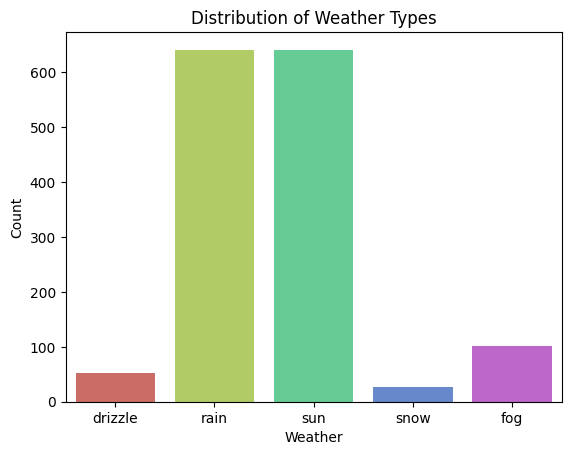

In [53]:
# counting the number of weather categories
sns.countplot(x=data["weather"], palette="hls")
# Adding labels and title
plt.xlabel("Weather")
plt.ylabel("Count")
plt.title("Distribution of Weather Types")

# Display the plot
plt.show()


In [ ]:
data['date']

In [12]:
data['date']=pd.to_datetime(data['date'])

In [ ]:
#Daily maximum temperature
x=data['date']
y=data['temp_max']

plt.plot(x,y,color='red')
plt.gca().set(xlabel='Date',ylabel='Temp_max in degree celcius',title='Distribution of maximum temperature')

plt.show()

In [ ]:
#Daily minimum temperature
x=data['date']
y=data['temp_min']

plt.plot(x,y,color='red')
plt.gca().set(xlabel='Date',ylabel='Temp_max in degree celcius',title='Distribution of minimum temperature')

plt.show()

In [50]:
print(data.columns)


Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'Month', 'month_year'],
      dtype='object')


In [48]:
# Convert the 'Date' column to a datetime format
data['date'] = pd.to_datetime(data['date'])

# Create a new column 'month_year' to store the year and month
data['month_year'] = data['date'].dt.to_period('M')

# Group by month_year, calculate maximum Temp_max, and reset index
linechart = data.groupby(data['month_year'].dt.strftime('%Y : %b'))['temp_min'].min().reset_index()

# Create a line chart using Plotly Express
fig = px.line(linechart,
               x='month_year',
               y='temp_min',
               height=500,
               width=1000,
               template='gridon')

# Set chart title and axis labels
fig.update_layout(title='Minimum Temperature Over Time',
                   xaxis_title='Month and Year',
                   yaxis_title='Minimum Temperature')

# Display the plot
fig.show()



In [52]:
import pandas as pd
import plotly.express as px

# Assuming you have already loaded your data into the 'data' DataFrame
# If not, you should load your data here using data = pd.read_csv('your_data.csv')

# Convert the 'Date' column to a datetime format
data['date'] = pd.to_datetime(data['date'])

# Create a new column 'month_year' to store the year and month
data['month_year'] = data['date'].dt.to_period('M')

# Group by month_year, calculate maximum Temp_max, and reset index
linechart = data.groupby(data['month_year'].dt.strftime('%Y : %b'))['temp_max'].min().reset_index()

# Create a line chart using Plotly Express
fig = px.line(linechart,
               x='month_year',
               y='temp_max',
               height=500,
               width=1000,
               template='gridon')

# Set chart title and axis labels
fig.update_layout(title='Maximum Temperature Over Time',
                   xaxis_title='Month and Year',
                   yaxis_title='Maximum Temperature')

# Display the plot
fig.show()

In [57]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40703 sha256=30e592e03e9e4a543bbaf76754d78157e0f9b05b8e64f17a1786a13557ef18f7
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


In [58]:
from fpdf import FPDF

In [ ]:
#Download combine report in pdf

font_color = (64,64,64)

#find all PNG files in the output folder
char_filenames =[str(chart_path) for chart_path in output_dir.glob("*.png")]

#create a pdf document and set the page size
pdf= FPDF()
pdf.set_font('Arial','B',24)

#add the overall page title
title = f"weather report {date.today().strftime(%m%d%y)}"
pdf.set_text_color(*font_color)
pdf.cell(0,20,title,align='c',ln=1)

#addeach chart to the pdf documents

for chart_filename in chart_filenames:
  pdf.ln(10)
  pdf.image(chart_filename,x=None,y=None)

#save the pdf document to a file on disk
pdf.output(output_dir / "weather_report.pdf","F")